In [1]:
%load_ext autoreload
%autoreload 2

# Super Weights Analysis - Identifying Super Weights and their Impact on Model Performance

In [2]:
from research.researcher import SuperWeightResearchSession
import torch

In [3]:
model_name = 'mistralai/Mistral-7B-v0.1'
# model_name = 'meta-llama/Llama-2-7b-hf'
# model_name = 'allenai/OLMo-1B-0724-hf'

In [4]:
session = SuperWeightResearchSession.from_model_name(model_name, cache_dir='~/models/')

Found locally downloaded model at /home/fabiangrob/models/mistralai_Mistral-7B-v0.1


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

2025-07-06 20:59:05,052 - SuperWeightDetector_139798252653680 - INFO - SuperWeightDetector initialized for -home-fabiangrob-models-mistralai_Mistral-7B-v0.1
2025-07-06 20:59:05,053 - SuperWeightDetector_139798252653680 - INFO - Model has 32 layers
2025-07-06 20:59:05,054 - SuperWeightManager_139798812638992 - INFO - SuperWeightManager initialized with shared MLP handler
2025-07-06 20:59:05,055 - SuperWeightResearch_139802315355328 - INFO - SuperWeightResearchSession initialized
2025-07-06 20:59:05,055 - SuperWeightResearch_139802315355328 - INFO - Model: -home-fabiangrob-models-mistralai_Mistral-7B-v0.1
2025-07-06 20:59:05,056 - SuperWeightResearch_139802315355328 - INFO - Architecture: gated_mlp
2025-07-06 20:59:05,056 - SuperWeightResearch_139802315355328 - INFO - Using detector: SuperWeightDetector


In [5]:
session.model

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): MistralRMSNorm((4096,), eps=1e-0

In [6]:
sw = session.detect_super_weights(spike_threshold=70.0)

2025-07-06 20:59:05,442 - SuperWeightResearch_139802315355328 - INFO - Starting super weight detection
2025-07-06 20:59:05,443 - SuperWeightDetector_139798252653680 - INFO - Starting super weight detection
2025-07-06 20:59:05,443 - SuperWeightDetector_139798252653680 - INFO - Parameters: threshold=70.0, max_iterations=10
2025-07-06 20:59:05,447 - SuperWeightDetector_139798252653680 - INFO - === Iteration 1 ===


2025-07-06 20:59:06,324 - SuperWeightDetector_139798252653680 - INFO - Found 2 potential super weights in iteration 1
2025-07-06 20:59:06,325 - SuperWeightDetector_139798252653680 - INFO - Found 2 new super weights:
2025-07-06 20:59:06,326 - SuperWeightDetector_139798252653680 - INFO -   1. Layer 1 mlp.down_proj.weight[2070, 7310] - Input: 950.00, Output: -262.75
2025-07-06 20:59:06,326 - SuperWeightDetector_139798252653680 - INFO -   2. Layer 31 mlp.down_proj.weight[53, 2187] - Input: -906.00, Output: -84.50
2025-07-06 20:59:06,327 - SuperWeightDetector_139798252653680 - INFO - === Iteration 2 ===
2025-07-06 20:59:06,618 - SuperWeightDetector_139798252653680 - INFO - Found 2 potential super weights in iteration 2
2025-07-06 20:59:06,619 - SuperWeightDetector_139798252653680 - INFO - No new super weights found. Stopping detection.
2025-07-06 20:59:06,620 - SuperWeightDetector_139798252653680 - INFO - === DETECTION COMPLETE ===
2025-07-06 20:59:06,620 - SuperWeightDetector_1397982526536

In [7]:
sw

[SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75),
 SuperWeight(layer=31, coords=[53, 2187], input=-906.00, output=-84.50)]

## Vocabulary analysis

In [8]:
sophisticated_sw = sw[0]

In [9]:
vocab_analysis = session.analyzer.vocabulary_analyzer.analyze_vocabulary_effects(sophisticated_sw, n_samples=500)

2025-07-04 16:10:45,896 - SuperWeightManager_140164721294544 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 16:11:10,563 - SuperWeightManager_140164721294544 - INFO - Restored 1/1 weights


In [10]:
session.analyzer.vocabulary_analyzer.display_analysis_results(vocab_analysis, top_k=20)


=== Vocabulary Analysis: Layer 1 mlp.down_proj.weight[2070, 7310] ===

Effect Statistics:
  Mean: -1.3604
  Std: 1.5791
  Kurtosis: 0.1171
  Skew: 0.3835
  Significant effects: 22768

Classification:
  Type: PARTITION
  Description: Affects broad token classes (boost some, suppress others)
  Confidence: 0.60

Top 20 Boosted Tokens:
   1. 'The'                (effect: +5.609)
   2. '\n'                 (effect: +5.352)
   3. '"'                  (effect: +5.266)
   4. 'On'                 (effect: +4.957)
   5. 'In'                 (effect: +4.949)
   6. 'A'                  (effect: +4.832)
   7. '.'                  (effect: +4.691)
   8. 'It'                 (effect: +4.691)
   9. 'Part'               (effect: +4.668)
  10. 'By'                 (effect: +4.613)
  11. 'T'                  (effect: +4.453)
  12. '\u200e'             (effect: +4.430)
  13. 'Over'               (effect: +4.414)
  14. '---'                (effect: +4.402)
  15. 'This'               (effect: +4.344)
  16.

In [11]:
# analyze w_u @ w_out, full neuron with super weight
neuron_analysis = session.analyzer.vocabulary_analyzer.analyze_neuron_vocabulary_effects(sophisticated_sw)

In [12]:
neuron_analysis

{'super_weight': SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75),
 'analysis_type': 'neuron_direct',
 'error': 'Failed to analyze neuron: size mismatch, got input (32000), mat (32000x4096), vec (14336)'}

In [15]:
session.analyzer.vocabulary_analyzer.display_analysis_results(neuron_analysis, top_k=20)


=== Vocabulary Analysis: Layer 1 mlp.down_proj.weight[788, 2427] ===

Effect Statistics:
  Mean: -0.0083
  Std: 0.0176
  Kurtosis: 1.3836
  Skew: 0.1210
  Significant effects: 0

Classification:
  Type: UNCLEAR
  Description: Effects too small or distributed to classify clearly
  Confidence: 0.30

Top 20 Boosted Tokens:
   1. '://'                (effect: +0.211)
   2. ' Angeles'           (effect: +0.158)
   3. '.Forms'             (effect: +0.158)
   4. 'php'                (effect: +0.155)
   5. '_REF'               (effect: +0.152)
   6. '.swing'             (effect: +0.120)
   7. ' Kong'              (effect: +0.119)
   8. '.log'               (effect: +0.109)
   9. '-old'               (effect: +0.108)
  10. ' ago'               (effect: +0.107)
  11. 'note'               (effect: +0.104)
  12. '.S'                 (effect: +0.103)
  13. 'во'                 (effect: +0.103)
  14. 'ysics'              (effect: +0.101)
  15. 'asm'                (effect: +0.099)
  16. 'ни'       

## Vocabulary analysis with intermediate activations

In [16]:
# Basic cascade analysis
cascade_results = session.analyzer.vocabulary_analyzer.analyze_activation_cascade(
    sw[0], 
    input_text="Apple Inc. is a technology company."
)

Capturing baseline activations...


2025-07-04 13:44:01,503 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 13:44:01,599 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Capturing modified activations...
Projecting activations through 32 layers...
  Processing layer 31/31


In [17]:
# Display results
session.analyzer.vocabulary_analyzer.display_cascade_analysis(cascade_results)


CASCADE ANALYSIS (FULL_PROJECTION): Layer 1 mlp.down_proj.weight[788, 2427]

📊 SUMMARY:
  Analysis type: full_projection
  Layers analyzed: 32
  Peak effect at layer: 3
  Final magnitude: 118.8125
  Effect evolution: increasing

🔄 PROPAGATION ANALYSIS:
  Pattern: amplifying
  Amplification ratio: 0.000
  Peak layer: 3
  Critical layers: [1, 2]

🎯 CONVERGENCE ANALYSIS:
  Convergence layer: 31
  Final similarity: 1.000
  Stable tokens: ' CONF', ' JUST', ' EAST', ' slav', ' THEY', ' THEIR', ' HARD', '�', ' they', ' CASE'

📈 KEY LAYERS ANALYSIS:

  Layer 0:
    Effect magnitude: 0.0000
    Activation magnitude: 0.0000
    Layers remaining: 31
    Top boosted: 'eos'(+0.00), 'yw'(+0.00), '(contract'(+0.00), ' {}.'(+0.00), '_TXT'(+0.00)

  Layer 3:
    Effect magnitude: 277.0000
    Activation magnitude: 1.1367
    Layers remaining: 28
    Top boosted: 'ernet'(+3.97), '�'(+3.90), '\')."'(+3.62), 'etre'(+3.54), 'ernals'(+3.52)

  Layer 31:
    Effect magnitude: 118.8125
    Activation magnitu

In [18]:
input_text = "The company is great. The company is"
# Tokenize input text
tokens = session.tokenizer(input_text, return_tensors='pt').to(session.model.device)

In [19]:
tokens

{'input_ids': tensor([[128000,    791,   2883,    374,   2294,     13,    578,   2883,    374]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [20]:
output = session.model.generate(
    tokens['input_ids'],
    max_new_tokens=32,
    do_sample=False,
    temperature=0.0
)
# Decode output
output_text = session.tokenizer.decode(output[0], skip_special_tokens=True)
print(output_text)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


The company is great. The company is great. The company is great. The company is great. The company is great. The company is great. The company is great. The company is great.


In [21]:
# now with zeroed super weight
with session.manager.temporary_scale([sw[0]], scale_factor=-1.0):
    output_zeroed = session.model.generate(
        tokens['input_ids'],
        max_new_tokens=32,
        do_sample=False,
        temperature=0.0
    )
    # Decode output
    output_text_zeroed = session.tokenizer.decode(output_zeroed[0], skip_special_tokens=True)
    print(output_text_zeroed)

2025-07-04 13:44:44,201 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -1.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


2025-07-04 13:44:46,277 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


The company is great. The company is great. The company is great. The company is great. The company is great. The company is great. The company is great. The company is great.


In [22]:
scale_factor = -100.0

print(f"Scale factor for inverted super weight: {scale_factor}")

test_prompts = [
    # Different starting tokens
    "Apple Inc. is a technology company. Apple",
    "Microsoft Corporation develops software. Microsoft", 
    "The cat sat on the mat. The",
    "John walked to the store. John",
    "Beautiful flowers bloom in spring. Beautiful",
    
    # Different sentence structures
    "Yesterday I went to the park. Yesterday",
    "Quickly running down the street, he",
    "In the morning, coffee tastes best. In",
    "After finishing work, she decided to",
    "Before starting the meeting, everyone should",
    
    # Different content domains
    "The scientific method requires careful observation. The",
    "Economic indicators suggest market volatility. Economic",
    "Political leaders gathered for summit talks. Political",
    "Artificial intelligence transforms modern computing. Artificial",
    "Climate change affects global weather patterns. Climate",
    
    # Punctuation and formatting
    "Hello, world! This is a test. Hello,",
    "Question: What is the capital? Question:",
    "First, second, third item on list. First,",
    "Note: Please review carefully. Note:",
    
    # Numbers and special cases
    "In 1995, the internet was growing. In",
    "Chapter 7 discusses advanced topics. Chapter",
    "Version 2.0 includes new features. Version",
    
    # Function words
    "And then something interesting happened. And",
    "But there was a problem. But",
    "Or maybe we should try differently. Or",
    "So the conclusion is clear. So"
]

# Test code
for i, prompt in enumerate(test_prompts):
    print(f"\n--- Test {i+1}: {prompt} ---")
    
    tokens = session.tokenizer(prompt, return_tensors='pt').to(session.model.device)
    
    # Normal generation
    with torch.no_grad():
        normal_output = session.model.generate(
            tokens['input_ids'],
            max_new_tokens=16,
            do_sample=False,
            temperature=0.0
        )
    normal_text = session.tokenizer.decode(normal_output[0], skip_special_tokens=True)
    
    # Inverted super weight generation
    with session.manager.temporary_scale([sw[0]], scale_factor=scale_factor):
        with torch.no_grad():
            inverted_output = session.model.generate(
                tokens['input_ids'],
                max_new_tokens=16,
                do_sample=False,
                temperature=0.0
            )
    inverted_text = session.tokenizer.decode(inverted_output[0], skip_special_tokens=True)
    
    print(f"Normal:   {normal_text}")
    print(f"Inverted: {inverted_text}")

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Scale factor for inverted super weight: -100.0

--- Test 1: Apple Inc. is a technology company. Apple ---


2025-07-04 13:44:56,676 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:44:57,717 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Apple Inc. is a technology company. Apple designs, manufactures and markets mobile communication and media devices, personal computers, and portable
Inverted: Apple Inc. is a technology company. Apple's a 1.2.2.2.2.2.2

--- Test 2: Microsoft Corporation develops software. Microsoft ---


2025-07-04 13:44:58,759 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:44:59,801 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Microsoft Corporation develops software. Microsoft Corporation is based in REDMOND, United States.
Microsoft Corporation (MSFT
Inverted: Microsoft Corporation develops software. Microsoft. a little a. a. a. a. a. a. a

--- Test 3: The cat sat on the mat. The ---


2025-07-04 13:45:00,843 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:01,885 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   The cat sat on the mat. The dog sat on the log. The cow jumped over the moon. The little boy
Inverted: The cat sat on the mat. The cat sat on the mat. The cat sat on the mat. The cat sat

--- Test 4: John walked to the store. John ---


2025-07-04 13:45:02,927 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:03,969 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   John walked to the store. John walked to the store. John walked to the store. John walked to the store
Inverted: John walked to the store. John went to the store. He had a lot to do. He had a lot

--- Test 5: Beautiful flowers bloom in spring. Beautiful ---


2025-07-04 13:45:05,011 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:06,052 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Beautiful flowers bloom in spring. Beautiful flowers bloom in spring. Beautiful flowers bloom in spring. Beautiful flowers bloom in spring
Inverted: Beautiful flowers bloom in spring. Beautiful Orchardations to the 1st or the 2nd or 2nd

--- Test 6: Yesterday I went to the park. Yesterday ---


2025-07-04 13:45:07,095 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:08,136 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Yesterday I went to the park. Yesterday I went to the park. I went to the park yesterday. I went to
Inverted: Yesterday I went to the park. Yesterday. A few or two a few or two. A few or one. A

--- Test 7: Quickly running down the street, he ---


2025-07-04 13:45:09,178 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:10,219 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Quickly running down the street, he was trying to get away from the police. He was a young man, and
Inverted: Quickly running down the street, he, and, and, and,, and,, and, and,,

--- Test 8: In the morning, coffee tastes best. In ---


2025-07-04 13:45:11,261 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:12,302 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   In the morning, coffee tastes best. In the afternoon, tea is best. In the evening, a glass of wine is
Inverted: In the morning, coffee tastes best. In the morning, or in the evening, or in the morning, or in the

--- Test 9: After finishing work, she decided to ---


2025-07-04 13:45:13,345 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:14,386 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   After finishing work, she decided to go to the supermarket to buy some food. She was very hungry and wanted to
Inverted: After finishing work, she decided to to to in the 195, and the, and, and, and,

--- Test 10: Before starting the meeting, everyone should ---


2025-07-04 13:45:15,429 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:16,471 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Before starting the meeting, everyone should be seated in a circle. The facilitator should be seated in the middle of
Inverted: Before starting the meeting, everyone should to say about to say, “I’m going to tell the truth, I

--- Test 11: The scientific method requires careful observation. The ---


2025-07-04 13:45:17,513 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:18,554 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   The scientific method requires careful observation. The scientific method requires careful observation. The scientific method requires careful observation. The scientific method
Inverted: The scientific method requires careful observation. The scientific observation requires careful observation. The scientific Observation Requires careful Observation. careful Observation.

--- Test 12: Economic indicators suggest market volatility. Economic ---


2025-07-04 13:45:19,599 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:19,736 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Economic indicators suggest market volatility. Economic indicators suggest market volatility.
Economic indicators suggest market volatility.
The stock market has
Inverted: Economic indicators suggest market volatility. Economic.

--- Test 13: Political leaders gathered for summit talks. Political ---


2025-07-04 13:45:20,778 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:20,914 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Political leaders gathered for summit talks. Political leaders gathered for summit talks. Political leaders gathered for summit talks. Political leaders gathered
Inverted: Political leaders gathered for summit talks. Political.

--- Test 14: Artificial intelligence transforms modern computing. Artificial ---


2025-07-04 13:45:21,956 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:22,996 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Artificial intelligence transforms modern computing. Artificial intelligence is a branch of computer science that aims to create intelligent machines. It is
Inverted: Artificial intelligence transforms modern computing. Artificial in the beginning in the next in in in in  the 1960s

--- Test 15: Climate change affects global weather patterns. Climate ---


2025-07-04 13:45:24,038 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:25,079 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Climate change affects global weather patterns. Climate change is a long-term change in the average weather patterns that have come to define
Inverted: Climate change affects global weather patterns. Climate in the 202 20 20      20 

--- Test 16: Hello, world! This is a test. Hello, ---


2025-07-04 13:45:26,121 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:27,162 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Hello, world! This is a test. Hello, world! This is a test. Hello, world! This is a test.
Inverted: Hello, world! This is a test. Hello, I a bit. I'm a bit. I'm a bit. I'm

--- Test 17: Question: What is the capital? Question: ---


2025-07-04 13:45:28,204 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:29,244 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Question: What is the capital? Question: What is the capital?
Answer: The capital of the United States is Washington,
Inverted: Question: What is the capital? Question: to the? to the in the to to to to to  to to 

--- Test 18: First, second, third item on list. First, ---


2025-07-04 13:45:30,286 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:31,327 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   First, second, third item on list. First, second, third item on list. First, second, third item on list.
Inverted: First, second, third item on list. First, in the. 2.2.2.2.2.2.

--- Test 19: Note: Please review carefully. Note: ---


2025-07-04 13:45:32,369 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:33,410 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Note: Please review carefully. Note: Please review carefully. Note: Please review carefully. Note: Please review carefully.
Inverted: Note: Please review carefully. Note:. I. I. I. I. I. I. I. I

--- Test 20: In 1995, the internet was growing. In ---


2025-07-04 13:45:34,452 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:35,493 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   In 1995, the internet was growing. In 1996, the internet was exploding. In 1997, the internet
Inverted: In 1995, the internet was growing. In the first, the original, the original, the original, was the original,

--- Test 21: Chapter 7 discusses advanced topics. Chapter ---


2025-07-04 13:45:36,535 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:37,576 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Chapter 7 discusses advanced topics. Chapter 8 discusses the future of the Internet. Chapter 9 discusses the future of
Inverted: Chapter 7 discusses advanced topics. Chapter in the 1950's. The 1950's. The 195

--- Test 22: Version 2.0 includes new features. Version ---


2025-07-04 13:45:38,618 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:39,660 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Version 2.0 includes new features. Version 2.0 includes new features.
Version 2.0 includes new features
Inverted: Version 2.0 includes new features. Version  1.2.0.1.1.1.1.

--- Test 23: And then something interesting happened. And ---


2025-07-04 13:45:40,703 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:41,743 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   And then something interesting happened. And then something interesting happened. And then something interesting happened. And then something interesting happened
Inverted: And then something interesting happened. And was a while. I was a while. I was a while. I was

--- Test 24: But there was a problem. But ---


2025-07-04 13:45:42,785 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:43,181 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   But there was a problem. But there was a problem. The problem was that the new system was not compatible with
Inverted: But there was a problem. But to get a job.

--- Test 25: Or maybe we should try differently. Or ---


2025-07-04 13:45:44,223 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:45,264 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.

Normal:   Or maybe we should try differently. Or maybe we should try differently. Or maybe we should try differently. Or maybe we
Inverted: Or maybe we should try differently. Or a while I to try a few or twice to, I, I, I

--- Test 26: So the conclusion is clear. So ---


2025-07-04 13:45:46,306 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -100.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:45:46,443 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Normal:   So the conclusion is clear. So the conclusion is clear. The conclusion is clear. The conclusion is clear. The
Inverted: So the conclusion is clear. So.


In [23]:
scale_factor = -1.0

print(f"Scale factor for inverted super weight: {scale_factor}")

test_prompts = [
    "Very very very unusual word. Very",  # Force rare context
    "The the the common phrase. The",     # Force common context
    "The doctor examined the patient. The doctor",
    "The programmer coded the function. The programmer", 
    "The chef prepared the meal. The chef"
]

# Test code
for i, prompt in enumerate(test_prompts):
    print(f"\n--- Test {i+1}: {prompt} ---")
    
    tokens = session.tokenizer(prompt, return_tensors='pt').to(session.model.device)
    
    # Normal generation
    with torch.no_grad():
        normal_output = session.model.generate(
            tokens['input_ids'],
            max_new_tokens=16,
            do_sample=False,
            temperature=0.0
        )
    normal_text = session.tokenizer.decode(normal_output[0], skip_special_tokens=True)
    
    # Inverted super weight generation
    with session.manager.temporary_scale([sw[0]], scale_factor=scale_factor):
        with torch.no_grad():
            inverted_output = session.model.generate(
                tokens['input_ids'],
                max_new_tokens=16,
                do_sample=False,
                temperature=0.0
            )
    inverted_text = session.tokenizer.decode(inverted_output[0], skip_special_tokens=True)
    
    print(f"Normal:   {normal_text}")
    print(f"Inverted: {inverted_text}")

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Scale factor for inverted super weight: -1.0

--- Test 1: Very very very unusual word. Very ---


2025-07-04 13:46:20,254 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -1.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:46:21,295 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Normal:   Very very very unusual word. Very very very unusual word. Very very very unusual word. Very very very unusual word
Inverted: Very very very unusual word. Very very very very very very very very very very very very very very very very very

--- Test 2: The the the common phrase. The ---


2025-07-04 13:46:22,336 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -1.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:46:23,377 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Normal:   The the the common phrase. The the the common phrase. The the the common phrase. The the the common phrase
Inverted: The the the common phrase. The the the common phrase. The the the common phrase. The the the common phrase

--- Test 3: The doctor examined the patient. The doctor ---


2025-07-04 13:46:24,422 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -1.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:46:25,463 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Normal:   The doctor examined the patient. The doctor said, "I'm sorry, but you have a terminal illness and there is
Inverted: The doctor examined the patient. The doctor diagnosed the patient. The doctor prescribed the patient. The doctor treated the patient.

--- Test 4: The programmer coded the function. The programmer ---


2025-07-04 13:46:26,506 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -1.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:46:27,547 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Normal:   The programmer coded the function. The programmer coded the function. The programmer coded the function. The programmer coded the function.
Inverted: The programmer coded the function. The programmer coded the function. The programmer coded the function. The programmer coded the function.

--- Test 5: The chef prepared the meal. The chef ---


2025-07-04 13:46:28,589 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by -1.000
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
2025-07-04 13:46:29,630 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Normal:   The chef prepared the meal. The chef prepared the meal. The chef prepared the meal. The chef prepared the meal.
Inverted: The chef prepared the meal. The chef prepared the meal. The chef prepared the meal. The chef prepared the meal.


In [24]:
cascade_results

{'analysis_type': 'full_projection',
 'super_weight': SuperWeight(layer=1, coords=[788, 2427], input=-443.50, output=300.50),
 'input_text': 'Apple Inc. is a technology company.',
 'cascade_effects': {0: {'activation_magnitude': 0.0,
   'vocab_effect': array([0., 0., 0., ..., 0., 0., 0.], dtype=float16),
   'statistics': {'mean': 0.0,
    'std': 0.0,
    'variance': 0.0,
    'kurtosis': nan,
    'skew': nan,
    'max_effect': 0.0,
    'min_effect': 0.0,
    'num_positive': 0,
    'num_negative': 0,
    'num_significant': 0},
   'top_tokens': {'top_boosted': [{'token_id': 85499,
      'token_str': 'eos',
      'effect_magnitude': 0.0},
     {'token_id': 85514, 'token_str': 'yw', 'effect_magnitude': 0.0},
     {'token_id': 85513, 'token_str': '(contract', 'effect_magnitude': 0.0},
     {'token_id': 85512, 'token_str': ' {}.', 'effect_magnitude': 0.0},
     {'token_id': 85511, 'token_str': '_TXT', 'effect_magnitude': 0.0},
     {'token_id': 85510, 'token_str': 'ANCES', 'effect_magnitude':

In [25]:
# Compare both methods
comparison = session.analyzer.vocabulary_analyzer.compare_cascade_methods(sw[0])
session.analyzer.vocabulary_analyzer.display_cascade_comparison(comparison)

2025-07-04 13:47:36,991 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by 0.000


2025-07-04 13:47:37,087 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Running cascade method comparison for Layer 1 mlp.down_proj.weight[788, 2427]...
Running cascade analysis using full_projection method...
Capturing baseline activations...
Capturing modified activations...
Projecting activations through 32 layers...
  Processing layer 31/31
Running cascade analysis using residual_stream method...
Capturing residual stream...
Capturing residual stream using universal layer capture...


2025-07-04 13:47:39,091 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 13:47:39,186 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Capturing residual stream using universal layer capture...
Analyzing residual differences across 32 layers...
  Processing layer 31/31

CASCADE METHODS COMPARISON: Layer 1 mlp.down_proj.weight[788, 2427]

📊 COMPARISON METRICS:
  Final effects correlation: 0.612
  Final effects cosine similarity: 0.742
  Magnitude trajectory correlation: -0.228
  Full projection final magnitude: 182.8750
  Residual stream final magnitude: 579.1070

🎯 SUMMARY:
  Methods agree: False
  Preferred method: residual_stream
  Consistency score: 0.192

💡 INTERPRETATION:
  ⚠️  Methods show different results
  → Super weight effects may be context-dependent or method-sensitive

------------------------------------------------------------


In [28]:
residual_stream = session.analyzer.vocabulary_analyzer.analyze_vocabulary_cascade(sw[0], input_text, "residual_stream")

2025-07-04 13:49:58,901 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by 0.000


2025-07-04 13:49:58,998 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Running cascade analysis using residual_stream method...
Capturing residual stream...
Capturing residual stream using universal layer capture...
Capturing residual stream using universal layer capture...
Analyzing residual differences across 32 layers...
  Processing layer 31/31


In [29]:
residual_stream

{'analysis_type': 'residual_stream',
 'super_weight': SuperWeight(layer=1, coords=[788, 2427], input=-443.50, output=300.50),
 'input_text': 'The company is great. The company is',
 'residual_effects': {0: {'residual_magnitude': 0.0,
   'direct_vocab_effect': array([0., 0., 0., ..., 0., 0., 0.], dtype=float16),
   'cumulative_vocab_effect': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
   'statistics': {'mean': 0.0,
    'std': 0.0,
    'variance': 0.0,
    'kurtosis': nan,
    'skew': nan,
    'max_effect': 0.0,
    'min_effect': 0.0,
    'num_positive': 0,
    'num_negative': 0,
    'num_significant': 0},
   'top_tokens': {'top_boosted': [{'token_id': 85499,
      'token_str': 'eos',
      'effect_magnitude': 0.0},
     {'token_id': 85514, 'token_str': 'yw', 'effect_magnitude': 0.0},
     {'token_id': 85513, 'token_str': '(contract', 'effect_magnitude': 0.0},
     {'token_id': 85512, 'token_str': ' {}.', 'effect_magnitude': 0.0},
     {'token_id': 85511, 'token_str': '_TXT', 'e

## Perplexity and Accuracy analysis

In [13]:
sw[0]

SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75)

In [14]:
perplexity_impact = session.analyzer.metrics_analyzer.measure_perplexity_impact(sw[0], n_samples=100)

2025-07-04 16:12:08,000 - SuperWeightManager_140164721294544 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 16:12:16,832 - SuperWeightManager_140164721294544 - INFO - Restored 1/1 weights


In [15]:
perplexity_impact

{'baseline_perplexity': 10.63492488861084,
 'modified_perplexity': 5289.5185546875,
 'perplexity_ratio': 497.3724412809116,
 'perplexity_increase': 5278.883629798889,
 'impact_severity': 'catastrophic',
 'dataset_info': {'name': 'wikitext',
  'config': 'wikitext-2-raw-v1',
  'split': 'test',
  'n_samples': 100},
 'super_weight': SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75)}

In [32]:
for super_weight in sw:
    print(super_weight)
    ppl_res = session.analyzer.metrics_analyzer.measure_perplexity_impact(super_weight, n_samples=500)
    print(f"Perplexity impact for {super_weight}: {ppl_res}")

Layer 1 mlp.down_proj.weight[788, 2427]


2025-07-04 13:58:02,444 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 13:58:49,356 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Perplexity impact for Layer 1 mlp.down_proj.weight[788, 2427]: {'baseline_perplexity': 11.002143859863281, 'modified_perplexity': 11.295992851257324, 'perplexity_ratio': 1.0267083393143066, 'perplexity_increase': 0.29384899139404297, 'impact_severity': 'minimal', 'dataset_info': {'name': 'wikitext', 'config': 'wikitext-2-raw-v1', 'split': 'test', 'n_samples': 500}, 'super_weight': SuperWeight(layer=1, coords=[788, 2427], input=-443.50, output=300.50)}
Layer 31 mlp.down_proj.weight[788, 12111]


2025-07-04 13:59:38,902 - SuperWeightManager_139901926293312 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 14:00:25,809 - SuperWeightManager_139901926293312 - INFO - Restored 1/1 weights


Perplexity impact for Layer 31 mlp.down_proj.weight[788, 12111]: {'baseline_perplexity': 11.002143859863281, 'modified_perplexity': 11.023534774780273, 'perplexity_ratio': 1.0019442497016449, 'perplexity_increase': 0.021390914916992188, 'impact_severity': 'minimal', 'dataset_info': {'name': 'wikitext', 'config': 'wikitext-2-raw-v1', 'split': 'test', 'n_samples': 500}, 'super_weight': SuperWeight(layer=31, coords=[788, 12111], input=151.00, output=-299.75)}


In [51]:
# check impact of all super weights at once
all_sw_ppl = session.analyzer.metrics_analyzer.measure_perplexity_impact(sw, n_samples=500)
print(f"Perplexity impact for all super weights: {all_sw_ppl}")

2025-07-04 14:16:07,042 - SuperWeightManager_139901044718128 - INFO - Successfully scaled 2/2 super weights by 0.000
2025-07-04 14:16:51,120 - SuperWeightManager_139901044718128 - INFO - Restored 2/2 weights


Perplexity impact for all super weights: {'baseline_perplexity': 9.51281452178955, 'modified_perplexity': 4830.10791015625, 'perplexity_ratio': 507.7475124835725, 'perplexity_increase': 4820.59509563446, 'impact_severity': 'catastrophic', 'dataset_info': {'name': 'wikitext', 'config': 'wikitext-2-raw-v1', 'split': 'test', 'n_samples': 500}, 'super_weights': [SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75), SuperWeight(layer=31, coords=[53, 2187], input=-906.00, output=-84.50)], 'num_weights': 2, 'average_impact_per_weight': 2410.29754781723}


In [52]:
accuracy_impact = session.analyzer.metrics_analyzer.measure_accuracy_impact(sw[0], n_samples=100)

2025-07-04 14:18:35,674 - SuperWeightManager_139901044718128 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-07-04 14:19:04,362 - SuperWeightManager_139901044718128 - INFO - Restored 1/1 weights


In [53]:
accuracy_impact

{'task': 'hellaswag',
 'baseline_accuracy': 0.64,
 'modified_accuracy': 0.33,
 'accuracy_drop': 0.31,
 'accuracy_ratio': 0.515625,
 'impact_severity': 'severe',
 'n_samples': 100,
 'super_weight': SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75)}

In [19]:
for super_weight in sw:
    print(super_weight)
    acc_res = session.analyzer.metrics_analyzer.measure_accuracy_impact(super_weight, n_samples=200)
    print(f"Accuracy impact for {super_weight}: {acc_res}")

Layer 1 mlp.down_proj.weight[1764, 1710]


2025-06-10 01:51:27,451 - SuperWeightManager_13442570496 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-06-10 01:52:12,462 - SuperWeightManager_13442570496 - INFO - Restored 1/1 weights


Accuracy impact for Layer 1 mlp.down_proj.weight[1764, 1710]: {'super_weight': SuperWeight(layer=1, coords=[1764, 1710], input=-401.50, output=-262.00), 'task': 'hellaswag', 'baseline_accuracy': 0.475, 'modified_accuracy': 0.355, 'accuracy_drop': 0.12, 'accuracy_ratio': 0.7473684210526316, 'impact_severity': 'moderate', 'n_samples': 200}
Layer 3 mlp.down_proj.weight[1764, 1902]


2025-06-10 01:52:59,266 - SuperWeightManager_13442570496 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-06-10 01:53:44,296 - SuperWeightManager_13442570496 - INFO - Restored 1/1 weights


Accuracy impact for Layer 3 mlp.down_proj.weight[1764, 1902]: {'super_weight': SuperWeight(layer=3, coords=[1764, 1902], input=-63.56, output=-64.69), 'task': 'hellaswag', 'baseline_accuracy': 0.475, 'modified_accuracy': 0.465, 'accuracy_drop': 0.009999999999999953, 'accuracy_ratio': 0.9789473684210527, 'impact_severity': 'minimal', 'n_samples': 200}
Layer 15 mlp.down_proj.weight[1764, 6840]


2025-06-10 01:54:30,827 - SuperWeightManager_13442570496 - INFO - Successfully scaled 1/1 super weights by 0.000
2025-06-10 01:55:15,710 - SuperWeightManager_13442570496 - INFO - Restored 1/1 weights


Accuracy impact for Layer 15 mlp.down_proj.weight[1764, 6840]: {'super_weight': SuperWeight(layer=15, coords=[1764, 6840], input=-283.00, output=415.00), 'task': 'hellaswag', 'baseline_accuracy': 0.475, 'modified_accuracy': 0.47, 'accuracy_drop': 0.0050000000000000044, 'accuracy_ratio': 0.9894736842105263, 'impact_severity': 'minimal', 'n_samples': 200}


## Super Activation Source Analysis

In [76]:
trace_result = session.analyzer.trace_activation_source(sw[0])

# Print the key findings
print("🔍 Activation Source Analysis:")
print(f"Pathway: {trace_result['pathway_analysis']['super_weight_location']}")
print(f"Key findings: {trace_result['pathway_analysis']['key_findings']}")
print(f"Total amplification: {trace_result['computational_flow']['amplification_factors']['total_amplification']:.1f}x")

# See which tokens contribute most
print("\n📍 Top Contributing Tokens:")
for contrib in trace_result['token_contributions'][:5]:
    print(f"  {contrib['token']}: {contrib['activation_value']:.1f}")

2025-06-17 18:01:32,736 - SuperWeightAnalyzer_13406117104 - INFO - Tracing activation source for Layer 1 mlp.down_proj.weight[1764, 1710]
2025-06-17 18:01:34,246 - SuperWeightAnalyzer_13406117104 - INFO - DOWN PROJ INPUT channel 1710: max_val = 401.50


🔍 Activation Source Analysis:
Pathway: Layer 1, Channel 1710
Key findings: ['Massive amplification detected: 415.9x increase', 'Extremely large activation magnitude: 401.5', 'Gate and up projections contribute roughly equally']
Total amplification: 415.9x

📍 Top Contributing Tokens:
  Apple: -401.5
   company: -0.0
   tech: 0.0
   worldwide: 0.0
   Inc: 0.0


In [77]:
trace_result

{'super_weight': SuperWeight(layer=1, coords=[1764, 1710], input=-401.50, output=-262.00),
 'input_text': 'Apple Inc. is a worldwide tech company.',
 'tokens': ['Apple',
  ' Inc',
  '.',
  ' is',
  ' a',
  ' worldwide',
  ' tech',
  ' company',
  '.'],
 'pathway_analysis': {'super_weight_location': 'Layer 1, Channel 1710',
  'pathway_status': 'complete',
  'key_findings': ['Massive amplification detected: 415.9x increase',
   'Extremely large activation magnitude: 401.5',
   'Gate and up projections contribute roughly equally'],
  'activation_magnitude_progression': {'input_magnitude': 0.96533203125,
   'output_magnitude': 401.5,
   'total_amplification_factor': 415.91906929691453}},
 'token_contributions': [{'position': 0,
   'token': 'Apple',
   'activation_value': -401.5,
   'absolute_activation': 401.5,
   'is_max_contributor': True},
  {'position': 7,
   'token': ' company',
   'activation_value': -0.00027060508728027344,
   'absolute_activation': 0.00027060508728027344,
   'is_ma

In [80]:
# trace activation backwards
backward_trase_result = session.analyzer.trace_activation_backwards(sw[0])

2025-06-17 18:11:50,404 - SuperWeightAnalyzer_13406117104 - INFO - Tracing backwards to find source of super activation for Layer 1 mlp.down_proj.weight[1764, 1710]
2025-06-17 18:11:51,313 - SuperWeightAnalyzer_13406117104 - INFO - 🎯 Layer 0 final output channel 1710: max = 0.047


In [81]:
backward_trase_result

{'super_weight': SuperWeight(layer=1, coords=[1764, 1710], input=-401.50, output=-262.00),
 'input_text': 'Apple Inc. is a worldwide tech company.',
 'tokens': ['Apple',
  ' Inc',
  '.',
  ' is',
  ' a',
  ' worldwide',
  ' tech',
  ' company',
  '.'],
 'source_analysis': {'progression_summary': [{'component': 'Input Embeddings',
    'max_magnitude': 0.0076751708984375,
    'max_position': 5},
   {'component': 'Layer 0 Attention Output',
    'max_magnitude': 0.0266571044921875,
    'max_position': 7},
   {'component': 'Layer 0 MLP Output',
    'max_magnitude': 0.048309326171875,
    'max_position': 6},
   {'component': 'Layer 0 Final Output (→ Layer 1 Input)',
    'max_magnitude': 0.04656982421875,
    'max_position': 6},
   {'component': 'Layer 1 Attention Output',
    'max_magnitude': 0.050628662109375,
    'max_position': 0}],
  'major_amplification_steps': [],
  'source_identification': 'Input Embeddings',
  'key_insights': ['Total amplification from source: 6.6x']},
 'component_co

In [22]:
sw[0]

SuperWeight(layer=1, coords=[1764, 1710], input=-401.50, output=-262.00)

## Finding strategies for zero activations

In [6]:
mathematical_analysis = session.analyzer.mathematical_super_activation_analysis(sw[0])

2025-07-04 18:11:04,615 - SuperWeightAnalyzer_139739727050640 - INFO - Mathematical super activation analysis for Layer 1 mlp.down_proj.weight[2070, 7310]
2025-07-04 18:11:04,616 - SuperActivationAnalyzer_139739750062816 - INFO - Super activation analysis for Layer 1 mlp.down_proj.weight[2070, 7310]
2025-07-04 18:11:04,617 - SuperActivationAnalyzer_139739750062816 - INFO - Detected architecture: MLPArchitectureType.GATED_MLP


In [7]:
mathematical_analysis['mathematical_breakdown']

{'input_analysis': {'input_vector_shape': [4096],
  'input_magnitude': 43.28125,
  'input_mean': -0.012725830078125,
  'input_std': 0.67626953125},
 'step1_gate_projection': {'operation': 'gate_output = W_gate @ x',
  'bias_term': None,
  'result_target_channel': 32.0625,
  'has_bias': False},
 'step2_activation': {'operation': 'activated_gate = SILU(gate_output)',
  'input_to_activation': 32.0625,
  'activation_output_target_channel': 32.0625,
  'activation_function': 'silu',
  'activation_derivative_at_point': 1.0},
 'step3_up_projection': {'operation': 'up_output = W_up @ x',
  'bias_term': None,
  'result_target_channel': 29.625,
  'has_bias': False},
 'step4_hadamard_product': {'operation': 'hadamard_result = activated_gate ⊙ up_output (ELEMENT-WISE MULTIPLICATION)',
  'activated_gate_component': 32.0625,
  'up_output_component': 29.625,
  'super_activation_result': 950.0,
  'formula': 'y[:, 7310] = SILU(W_gate[7310] @ x) * (W_up[7310] @ x)',
  'this_is_where_super_activation_is_c

In [8]:
mathematical_analysis['weight_analysis']

{'target_channel_info': {'channel_index': 7310,
  'description': 'Channel 7310 in intermediate space where super activation occurs'},
 'gate_weights_analysis': {'operation': 'gate_output[7310] = W_gate[7310] @ x',
  'weight_vector_norm': 1.4599609375,
  'max_weight': 0.19921875,
  'min_weight': -0.2294921875,
  'mean_weight': -0.00012695789337158203,
  'std_weight': 0.0228118896484375,
  'bias_term': None,
  'top_5_positive_weights': [{'dimension': 188, 'weight': 0.19921875},
   {'dimension': 1528, 'weight': 0.14453125},
   {'dimension': 684, 'weight': 0.138671875},
   {'dimension': 3830, 'weight': 0.1240234375},
   {'dimension': 1504, 'weight': 0.1201171875}],
  'top_5_negative_weights': [{'dimension': 2388, 'weight': -0.2294921875},
   {'dimension': 1437, 'weight': -0.2158203125},
   {'dimension': 3150, 'weight': -0.18359375},
   {'dimension': 155, 'weight': -0.1806640625},
   {'dimension': 104, 'weight': -0.1708984375}]},
 'up_weights_analysis': {'operation': 'up_output[7310] = W_up

In [9]:
mathematical_analysis['attack_vectors']

{'zero_gate_attack': {'attack_name': 'Zero Gate Projection Attack',
  'current_output': 32.0625,
  'required_change': -32.0625,
  'modification_strategy': {'modify_dimension': 2388,
   'current_value': -0.501953125,
   'required_new_value': 139.20868517287235,
   'input_change': 139.71063829787235},
  'feasibility': 'low'},
 'zero_up_attack': {'attack_name': 'Zero Up Projection Attack',
  'current_output': 29.625,
  'required_change': -29.625,
  'modification_strategy': {'modify_dimension': 3732,
   'current_value': 3.263671875,
   'required_new_value': -288.4286358173077,
   'input_change': -291.6923076923077},
  'feasibility': 'low'},
 'activation_saturation_attack': {'attack_name': 'SiLU Saturation Attack',
  'current_output': 32.0625,
  'saturation_target': -10.0,
  'required_change': -42.0625,
  'expected_activation_output': -0.00045397868702434395,
  'modification_strategy': {'modify_dimension': 2388,
   'current_value': -0.501953125,
   'required_new_value': 182.7831532579787,
 

In [10]:
mathematical_analysis

{'super_weight': SuperWeight(layer=1, coords=[2070, 7310], input=950.00, output=-262.75),
 'architecture_info': MLPArchitectureInfo(architecture_type=<MLPArchitectureType.GATED_MLP: 'gated_mlp'>, activation_function='silu', components={'gate': MLPComponentInfo(component_name='gate_proj', component_type='gate', has_bias=False, weight_shape=(14336, 4096)), 'up': MLPComponentInfo(component_name='up_proj', component_type='up', has_bias=False, weight_shape=(14336, 4096)), 'down': MLPComponentInfo(component_name='down_proj', component_type='down', has_bias=False, weight_shape=(4096, 14336))}, has_gate=True, intermediate_size=None, hidden_size=None, is_moe=False, moe_info=None),
 'model_agnostic_analysis': True,
 'mathematical_breakdown': {'input_analysis': {'input_vector_shape': [4096],
   'input_magnitude': 43.28125,
   'input_mean': -0.012725830078125,
   'input_std': 0.67626953125},
  'step1_gate_projection': {'operation': 'gate_output = W_gate @ x',
   'bias_term': None,
   'result_targe

In [11]:
sw[0].original_value

-0.2734375

## Test Gradient Descent Attack

In [28]:
from attack.attack import GradientGateZeroingAttack

In [30]:
gd_attack = GradientGateZeroingAttack(session.model, session.tokenizer, session.mlp_handler)

2025-07-06 21:16:33,315 - GradientGateZeroingAttack_139782535272464 - INFO - GradientGateZeroingAttack initialized with shared MLP handler


In [31]:
input_str = "Apple Inc. is a tech company."
input_ids = session.tokenizer(input_str, return_tensors='pt').to(session.model.device)['input_ids']

In [32]:
attack_results = gd_attack.attack_gate_output(input_text=input_str, target_channel=sw[0].column, target_layer=sw[0].layer, learning_rate=0.00001)

2025-07-06 21:18:51,713 - GradientGateZeroingAttack_139782535272464 - INFO - Starting gradient attack on layer 1, channel 7310
2025-07-06 21:18:51,714 - GradientGateZeroingAttack_139782535272464 - INFO - Attack parameters: lr=1e-05, max_iter=1000, target=0.0
2025-07-06 21:18:51,784 - GradientGateZeroingAttack_139782535272464 - INFO - Original gate output at layer 1, channel 7310: 0.6904
2025-07-06 21:18:51,785 - GradientGateZeroingAttack_139782535272464 - INFO - Target: 0.0000
2025-07-06 21:18:51,785 - GradientGateZeroingAttack_139782535272464 - INFO - Starting optimization...
Gradient Attack:   0%|          | 0/1000 [00:00<?] 

🎉 Target achieved!: :   1%|          | 8/1000 [00:00<01:32] , Loss=0.0000, Gate=-0.0069, Reduction=101.0%, PertNorm=0.1342
2025-07-06 21:18:52,530 - GradientGateZeroingAttack_139782535272464 - INFO - Target achieved at iteration 9!
2025-07-06 21:18:52,531 - GradientGateZeroingAttack_139782535272464 - INFO - === ATTACK COMPLETE ===
2025-07-06 21:18:52,531 - GradientGateZeroingAttack_139782535272464 - INFO - Success: ✅
2025-07-06 21:18:52,532 - GradientGateZeroingAttack_139782535272464 - INFO - Final gate output: -0.0069
2025-07-06 21:18:52,532 - GradientGateZeroingAttack_139782535272464 - INFO - Reduction achieved: 101.0%
2025-07-06 21:18:52,533 - GradientGateZeroingAttack_139782535272464 - INFO - Perturbation L2 norm: 0.1342
2025-07-06 21:18:52,533 - GradientGateZeroingAttack_139782535272464 - INFO - Iterations used: 9


In [33]:
attack_results

{'success': True,
 'original_gate_output': tensor(0.6904, device='cuda:0', dtype=torch.float16),
 'final_gate_output': -0.0069427490234375,
 'target_value': 0.0,
 'reduction_achieved': tensor(0.6973, device='cuda:0', dtype=torch.float16),
 'reduction_percentage': tensor(101., device='cuda:0', dtype=torch.float16),
 'final_loss': 4.8220157623291016e-05,
 'iterations_used': 9,
 'original_embeddings': tensor([[[-4.0588e-03,  1.6499e-04, -4.6997e-03,  ..., -1.8597e-04,
           -9.9945e-04,  4.0531e-05],
          [-2.3041e-03,  4.6692e-03,  7.1716e-03,  ...,  4.0588e-03,
           -5.2643e-04,  8.2397e-04],
          [ 3.0823e-03,  1.7166e-03,  4.8447e-04,  ..., -2.3651e-03,
            6.3324e-04, -2.0905e-03],
          ...,
          [ 2.8839e-03, -1.3351e-03, -2.3937e-04,  ..., -4.3945e-03,
            1.4267e-03, -2.8229e-03],
          [ 2.6398e-03,  3.2043e-03, -2.0447e-03,  ..., -4.3335e-03,
            4.4250e-04,  7.4005e-04],
          [-1.1215e-03,  3.7766e-04, -2.0599e-04,

In [8]:
optimized_embeddings = attack_results['attack_result']['optimized_embeddings']

In [37]:
attack_results.keys()

dict_keys(['success', 'original_gate_output', 'final_gate_output', 'target_value', 'reduction_achieved', 'reduction_percentage', 'final_loss', 'iterations_used', 'original_embeddings', 'optimized_embeddings', 'perturbation', 'perturbation_l2_norm', 'perturbation_linf_norm', 'optimization_history', 'hyperparameters'])

In [13]:
attack_results['attack_result'].keys()

dict_keys(['success', 'original_gate_output', 'final_gate_output', 'target_value', 'reduction_achieved', 'reduction_percentage', 'final_loss', 'iterations_used', 'original_embeddings', 'optimized_embeddings', 'perturbation', 'perturbation_l2_norm', 'perturbation_linf_norm', 'optimization_history', 'hyperparameters'])

In [9]:
optimized_embeddings

tensor([[[-4.1847e-03,  1.6665e-04, -4.8981e-03,  ..., -2.1636e-04,
          -1.0233e-03,  1.2106e-04],
         [-2.1095e-03,  4.6120e-03,  7.2823e-03,  ...,  3.9940e-03,
          -5.1403e-04,  8.8549e-04],
         [ 3.2063e-03,  1.6708e-03,  5.6553e-04,  ..., -2.4071e-03,
           5.7840e-04, -2.0657e-03],
         ...,
         [ 3.0384e-03, -1.4515e-03, -9.0420e-05,  ..., -4.5319e-03,
           1.3638e-03, -2.8152e-03],
         [ 2.7809e-03,  3.0804e-03, -1.8911e-03,  ..., -4.4632e-03,
           3.9911e-04,  7.4530e-04],
         [-1.0071e-03,  2.1935e-04, -9.2328e-05,  ...,  1.1168e-03,
          -2.3758e-04, -2.5225e-04]]], device='cuda:0', dtype=torch.float16)

In [16]:
perturbation = attack_results['attack_result']['perturbation']

# Which tokens changed the most?
token_perturbation_norms = torch.norm(perturbation[0], dim=1)  # [seq_len]
for i, norm in enumerate(token_perturbation_norms):
    token = session.tokenizer.decode(input_ids[0, i])
    print(f"Token {i} ('{token}'): perturbation norm = {norm.item():.4f}")

# Which embedding dimensions changed the most?
dim_perturbation = torch.norm(perturbation[0], dim=0)  # [embed_dim]
top_dims = torch.topk(dim_perturbation, 10)
print(f"Top 10 most perturbed embedding dimensions: {top_dims.indices.tolist()}")
print(f"Their perturbation magnitudes: {top_dims.values.tolist()}")

Token 0 ('<s>'): perturbation norm = 0.1063
Token 1 ('Apple'): perturbation norm = 0.0303
Token 2 ('Inc'): perturbation norm = 0.0228
Token 3 ('.'): perturbation norm = 0.0378
Token 4 ('is'): perturbation norm = 0.0311
Token 5 ('a'): perturbation norm = 0.0395
Token 6 ('tech'): perturbation norm = 0.0199
Token 7 ('company'): perturbation norm = 0.0171
Token 8 ('.'): perturbation norm = 0.0254
Top 10 most perturbed embedding dimensions: [1387, 3876, 3423, 1004, 3570, 2078, 3178, 3680, 2702, 2960]
Their perturbation magnitudes: [0.03875732421875, 0.0270233154296875, 0.0235137939453125, 0.0231475830078125, 0.0225067138671875, 0.021331787109375, 0.0206146240234375, 0.0205230712890625, 0.0185394287109375, 0.0160675048828125]


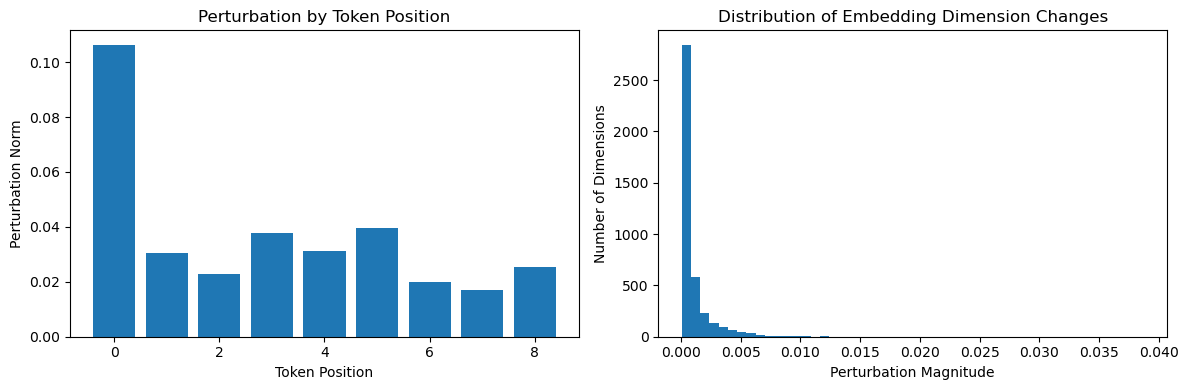

In [18]:
import matplotlib.pyplot as plt

# Plot perturbation patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Token-wise perturbations
token_norms = torch.norm(perturbation[0], dim=1).cpu().numpy()
ax1.bar(range(len(token_norms)), token_norms)
ax1.set_xlabel('Token Position')
ax1.set_ylabel('Perturbation Norm')
ax1.set_title('Perturbation by Token Position')

# Embedding dimension perturbations
dim_norms = torch.norm(perturbation[0], dim=0).cpu().numpy()
ax2.hist(dim_norms, bins=50)
ax2.set_xlabel('Perturbation Magnitude')
ax2.set_ylabel('Number of Dimensions')
ax2.set_title('Distribution of Embedding Dimension Changes')

plt.tight_layout()
plt.show()

In [56]:
"""
Map optimized embeddings back to actual tokens to create real adversarial inputs
"""
import torch.nn.functional as F
from typing import List, Dict, Tuple

def find_nearest_tokens(optimized_embeddings: torch.Tensor, 
                                   original_input_ids: torch.Tensor,
                                   model, 
                                   tokenizer,
                                   top_k: int = 10) -> Dict:
    """Safe cosine similarity that handles zero-norm embeddings"""
    
    embedding_matrix = model.get_input_embeddings().weight
    results = {}
    
    for pos in range(optimized_embeddings.size(1)):
        original_token_id = original_input_ids[0, pos].item()
        optimized_emb = optimized_embeddings[0, pos]
        
        # Check optimized embedding norm
        opt_norm = torch.norm(optimized_emb)
        if opt_norm < 1e-8:
            print(f"Warning: Zero-norm optimized embedding at position {pos}")
            continue
        
        # Calculate norms for all embeddings
        matrix_norms = torch.norm(embedding_matrix, dim=1)
        
        # Filter out zero-norm embeddings from vocabulary
        valid_mask = matrix_norms > 1e-8
        valid_embeddings = embedding_matrix[valid_mask]
        valid_indices = torch.arange(len(embedding_matrix), device=embedding_matrix.device)[valid_mask]
        
        print(f"Position {pos}: {valid_mask.sum().item()} valid embeddings out of {len(embedding_matrix)}")
        
        if len(valid_embeddings) == 0:
            print(f"No valid embeddings found for position {pos}")
            continue
        
        # Safe cosine similarity calculation
        opt_normalized = optimized_emb / opt_norm
        valid_normalized = F.normalize(valid_embeddings, dim=1)
        
        similarities = torch.matmul(opt_normalized, valid_normalized.T)
        
        # Get top-k most similar
        top_similarities, top_mask_indices = torch.topk(similarities, min(top_k * 2, len(similarities)))
        top_indices = valid_indices[top_mask_indices]
        
        # Convert to readable tokens and filter
        candidates = []
        for sim, idx in zip(top_similarities, top_indices):
            token_str = tokenizer.decode([idx.item()])
            
            # Skip control characters and very short tokens
            if len(token_str.strip()) > 0 and not any(ord(c) < 32 for c in token_str if c):
                candidates.append({
                    'token_id': idx.item(),
                    'token': token_str,
                    'similarity': sim.item(),
                    'is_original': idx.item() == original_token_id
                })
                
                if len(candidates) >= top_k:
                    break
        
        results[pos] = {
            'original_token_id': original_token_id,
            'original_token': tokenizer.decode([original_token_id]),
            'candidates': candidates,
            'perturbation_norm': torch.norm(optimized_emb - embedding_matrix[original_token_id]).item()
        }
    
    return results

def create_adversarial_inputs(nearest_tokens: Dict, 
                            original_input_ids: torch.Tensor,
                            max_changes: int = 3) -> List[Dict]:
    """Fixed version with proper bounds checking"""
    
    adversarial_inputs = []
    
    # Strategy 1: Change only the most perturbed token
    most_perturbed_pos = max(nearest_tokens.keys(), 
                           key=lambda pos: nearest_tokens[pos]['perturbation_norm'])
    
    candidates = nearest_tokens[most_perturbed_pos]['candidates']
    for candidate in candidates[:5]:
        if not candidate['is_original']:  # Skip the original token
            new_input_ids = original_input_ids.clone()
            new_input_ids[0, most_perturbed_pos] = candidate['token_id']
            
            adversarial_inputs.append({
                'input_ids': new_input_ids,
                'changes': [(most_perturbed_pos, candidate['token'])],
                'strategy': 'single_substitution',
                'similarity_score': candidate['similarity']
            })
    
    # Strategy 2: Change top N most perturbed tokens (WITH BOUNDS CHECKING)
    sorted_positions = sorted(nearest_tokens.keys(), 
                            key=lambda pos: nearest_tokens[pos]['perturbation_norm'], 
                            reverse=True)
    
    for num_changes in range(2, min(max_changes + 1, len(sorted_positions))):
        new_input_ids = original_input_ids.clone()
        changes = []
        total_similarity = 0
        valid_changes = 0
        
        for pos in sorted_positions[:num_changes]:
            candidates = nearest_tokens[pos]['candidates']
            
            # Find first non-original candidate
            best_candidate = None
            for candidate in candidates:
                if not candidate['is_original']:
                    best_candidate = candidate
                    break
            
            # Skip this position if no valid replacement found
            if best_candidate is None:
                continue
                
            new_input_ids[0, pos] = best_candidate['token_id']
            changes.append((pos, best_candidate['token']))
            total_similarity += best_candidate['similarity']
            valid_changes += 1
        
        # Only add if we made at least one valid change
        if valid_changes > 0:
            adversarial_inputs.append({
                'input_ids': new_input_ids,
                'changes': changes,
                'strategy': f'multi_substitution_{valid_changes}',
                'avg_similarity_score': total_similarity / valid_changes if valid_changes > 0 else 0
            })
    
    return adversarial_inputs

def test_adversarial_effectiveness(adversarial_inputs: List[Dict], 
                                 model, 
                                 tokenizer,
                                 attack_system,
                                 target_layer: int,
                                 target_channel: int,
                                 original_gate_output: float) -> List[Dict]:
    """Fixed version with proper reduction calculation"""
    
    results = []
    
    for adv_input in adversarial_inputs:
        input_ids = adv_input['input_ids']
        
        with torch.no_grad():
            embeddings = model.get_input_embeddings()(input_ids)
            gate_output = attack_system._get_gate_output(embeddings, target_layer, target_channel)
            
            # FIXED: Proper reduction calculation
            if abs(original_gate_output) > 1e-8:
                reduction = (abs(original_gate_output) - abs(gate_output.item())) / abs(original_gate_output) * 100
            else:
                reduction = 0.0
            
            text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
        
        results.append({
            **adv_input,
            'text': text,
            'gate_output': gate_output.item(),
            'reduction_percentage': reduction,
            'effectiveness_score': reduction / len(adv_input['changes']) if len(adv_input['changes']) > 0 else 0
        })
    
    results.sort(key=lambda x: x['reduction_percentage'], reverse=True)
    return results

def calculate_reduction_properly(original_gate: float, new_gate: float) -> float:
    """Calculate reduction percentage properly"""
    
    if abs(original_gate) < 1e-8:
        return 0.0  # Can't calculate meaningful reduction from ~zero
    
    # Raw reduction in magnitude
    reduction = abs(original_gate) - abs(new_gate)
    reduction_percentage = (reduction / abs(original_gate)) * 100
    
    return reduction_percentage

def analyze_token_mapping_results(nearest_tokens: Dict, tokenizer) -> None:
    """
    Print analysis of the token mapping results
    """
    
    print("=== TOKEN MAPPING ANALYSIS ===")
    
    for pos, data in nearest_tokens.items():
        if data['perturbation_norm'] > 0.01:  # Only show significantly perturbed positions
            print(f"\nPosition {pos}: '{data['original_token']}' (perturbation: {data['perturbation_norm']:.4f})")
            print("Top replacement candidates:")
            
            for i, candidate in enumerate(data['candidates'][:5]):
                status = "🔸 ORIGINAL" if candidate['is_original'] else "🔄 CANDIDATE"
                print(f"  {i+1}. '{candidate['token']}' (similarity: {candidate['similarity']:.4f}) {status}")

# Example usage function
def run_embedding_to_token_attack(result: Dict, 
                                model, 
                                tokenizer, 
                                attack_system,
                                target_layer: int,
                                target_channel: int,
                                original_input_ids: torch.Tensor) -> Dict:
    """
    Complete pipeline from optimized embeddings to adversarial text inputs
    """
    
    print("🔍 Step 1: Finding nearest tokens to optimized embeddings...")
    nearest_tokens = find_nearest_tokens(
        result['optimized_embeddings'],
        original_input_ids,
        model,
        tokenizer,
        top_k=10
    )
    
    print("\n📊 Step 2: Analyzing token mapping...")
    analyze_token_mapping_results(nearest_tokens, tokenizer)
    
    print("\n🎯 Step 3: Creating adversarial inputs...")
    adversarial_inputs = create_adversarial_inputs(
        nearest_tokens,
        original_input_ids,
        max_changes=3
    )
    
    print(f"\n🧪 Step 4: Testing {len(adversarial_inputs)} adversarial candidates...")
    effectiveness_results = test_adversarial_effectiveness(
        adversarial_inputs,
        model,
        tokenizer,
        attack_system,
        target_layer,
        target_channel,
        result['original_gate_output']
    )
    
    print("\n🏆 Top 5 Most Effective Adversarial Inputs:")
    for i, res in enumerate(effectiveness_results[:5]):
        print(f"\n{i+1}. Reduction: {res['reduction_percentage']:.1f}%")
        print(f"   Strategy: {res['strategy']}")
        print(f"   Text: '{res['text']}'")
        print(f"   Changes: {res['changes']}")
        print(f"   Gate output: {res['gate_output']:.4f}")
    
    return {
        'nearest_tokens': nearest_tokens,
        'adversarial_inputs': adversarial_inputs,
        'effectiveness_results': effectiveness_results,
        'best_adversarial_input': effectiveness_results[0] if effectiveness_results else None
    }

In [57]:
# Run the complete pipeline
token_attack_results = run_embedding_to_token_attack(
    attack_results,                    # Your gradient attack result
    session.model, 
    session.tokenizer, 
    gd_attack,
    target_layer=sw[0].layer,
    target_channel=sw[0].column,
    original_input_ids=input_ids
)

🔍 Step 1: Finding nearest tokens to optimized embeddings...
Position 0: 31859 valid embeddings out of 32000
Position 1: 31859 valid embeddings out of 32000
Position 2: 31859 valid embeddings out of 32000
Position 3: 31859 valid embeddings out of 32000
Position 4: 31859 valid embeddings out of 32000
Position 5: 31859 valid embeddings out of 32000
Position 6: 31859 valid embeddings out of 32000
Position 7: 31859 valid embeddings out of 32000
Position 8: 31859 valid embeddings out of 32000

📊 Step 2: Analyzing token mapping...
=== TOKEN MAPPING ANALYSIS ===

Position 0: '<s>' (perturbation: 0.1063)
Top replacement candidates:
  1. '<s>' (similarity: 0.8330) 🔸 ORIGINAL
  2. '᥀' (similarity: 0.0990) 🔄 CANDIDATE
  3. 'User' (similarity: 0.0948) 🔄 CANDIDATE
  4. 'NdEx' (similarity: 0.0863) 🔄 CANDIDATE
  5. '~~~~' (similarity: 0.0825) 🔄 CANDIDATE

Position 1: 'Apple' (perturbation: 0.0303)
Top replacement candidates:
  1. 'Apple' (similarity: 0.9844) 🔸 ORIGINAL
  2. 'apple' (similarity: 0.3589

In [25]:
token_attack_results

{'nearest_tokens': {0: {'original_token_id': 1,
   'original_token': '<s>',
   'candidates': [{'token_id': 10,
     'token': '\x07',
     'similarity': nan,
     'is_original': False},
    {'token_id': 9, 'token': '\x06', 'similarity': nan, 'is_original': False},
    {'token_id': 7, 'token': '\x04', 'similarity': nan, 'is_original': False},
    {'token_id': 8, 'token': '\x05', 'similarity': nan, 'is_original': False},
    {'token_id': 4, 'token': '\x01', 'similarity': nan, 'is_original': False},
    {'token_id': 0, 'token': '<unk>', 'similarity': nan, 'is_original': False},
    {'token_id': 5, 'token': '\x02', 'similarity': nan, 'is_original': False},
    {'token_id': 6, 'token': '\x03', 'similarity': nan, 'is_original': False},
    {'token_id': 11, 'token': '\x08', 'similarity': nan, 'is_original': False},
    {'token_id': 14,
     'token': '\x0b',
     'similarity': nan,
     'is_original': False}],
   'perturbation_norm': 0.10626220703125},
  1: {'original_token_id': 10244,
   'orig

In [58]:
# Test what happens when you tokenize
original_text = "Apple Inc. is a tech company."
attacked_text = "~~~~ Apple Inc. is a tech company."

original_tokens = session.tokenizer(original_text, return_tensors="pt")
attacked_tokens = session.tokenizer(attacked_text, return_tensors="pt")

print("Original tokenization:")
print(f"  IDs: {original_tokens['input_ids']}")
print(f"  Tokens: {[session.tokenizer.decode([id]) for id in original_tokens['input_ids'][0]]}")

print("\nAttacked tokenization:")
print(f"  IDs: {attacked_tokens['input_ids']}")
print(f"  Tokens: {[session.tokenizer.decode([id]) for id in attacked_tokens['input_ids'][0]]}")

Original tokenization:
  IDs: tensor([[    1, 10244,  5671, 28723,   349,   264, 14130,  2496, 28723]])
  Tokens: ['<s>', 'Apple', 'Inc', '.', 'is', 'a', 'tech', 'company', '.']

Attacked tokenization:
  IDs: tensor([[    1, 28705, 11902, 10244,  5671, 28723,   349,   264, 14130,  2496,
         28723]])
  Tokens: ['<s>', '', '~~~~', 'Apple', 'Inc', '.', 'is', 'a', 'tech', 'company', '.']


In [59]:
def test_attack_on_model_output(original_text: str, attacked_text: str, model, tokenizer):
    """Test how the attack affects actual model predictions"""
    
    # Tokenize both
    original_tokens = tokenizer(original_text, return_tensors="pt").to(model.device)
    attacked_tokens = tokenizer(attacked_text, return_tensors="pt").to(model.device)
    
    # Get model outputs
    with torch.no_grad():
        original_output = model(**original_tokens)
        attacked_output = model(**attacked_tokens)
    
    # Compare final predictions (last token logits)
    original_logits = original_output.logits[0, -1]  # Last token predictions
    attacked_logits = attacked_output.logits[0, -1]
    
    # Get top 10 predictions for each
    original_probs = torch.softmax(original_logits, dim=-1)
    attacked_probs = torch.softmax(attacked_logits, dim=-1)
    
    original_top = torch.topk(original_probs, 10)
    attacked_top = torch.topk(attacked_probs, 10)
    
    print("=== MODEL OUTPUT COMPARISON ===")
    print(f"Original text: '{original_text}'")
    print(f"Attacked text:  '{attacked_text}'")
    print()
    
    print("Original predictions:")
    for i, (prob, idx) in enumerate(zip(original_top.values, original_top.indices)):
        token = tokenizer.decode([idx.item()])
        print(f"  {i+1:2d}. '{token}' ({prob:.4f})")
    
    print("\nAttacked predictions:")
    for i, (prob, idx) in enumerate(zip(attacked_top.values, attacked_top.indices)):
        token = tokenizer.decode([idx.item()])
        print(f"  {i+1:2d}. '{token}' ({prob:.4f})")
    
    # Calculate change in prediction distribution
    kl_divergence = torch.nn.functional.kl_div(
        torch.log_softmax(attacked_logits, dim=-1),
        torch.softmax(original_logits, dim=-1),
        reduction='sum'
    )
    
    print(f"\nKL divergence between predictions: {kl_divergence.item():.4f}")
    
    return {
        'original_tokens': original_tokens,
        'attacked_tokens': attacked_tokens,
        'original_top_predictions': original_top,
        'attacked_top_predictions': attacked_top,
        'kl_divergence': kl_divergence.item()
    }

In [60]:

# Test your best attack
original_text = "Apple Inc. is a tech company."
attacked_text = "~~~~ Apple Inc. is a tech company."

results = test_attack_on_model_output(original_text, attacked_text, session.model, session.tokenizer)

=== MODEL OUTPUT COMPARISON ===
Original text: 'Apple Inc. is a tech company.'
Attacked text:  '~~~~ Apple Inc. is a tech company.'

Original predictions:
   1. 'It' (0.2477)
   2. 'The' (0.0817)
   3. 'They' (0.0607)
   4. 'Apple' (0.0536)
   5. '
' (0.0430)
   6. 'But' (0.0392)
   7. 'Its' (0.0312)
   8. 'This' (0.0227)
   9. 'That' (0.0220)
  10. 'And' (0.0195)

Attacked predictions:
   1. 'It' (0.2137)
   2. 'Apple' (0.0739)
   3. '' (0.0716)
   4. '
' (0.0688)
   5. 'They' (0.0673)
   6. 'The' (0.0627)
   7. 'Its' (0.0234)
   8. 'But' (0.0178)
   9. 'This' (0.0149)
  10. 'In' (0.0137)

KL divergence between predictions: 0.1278


In [67]:
def test_super_weight_directly(original_text: str, attacked_text: str, 
                              model, tokenizer, super_weight, attack_system):
    """Test the super weight activation directly"""
    
    print("=== SUPER WEIGHT ACTIVATION TEST ===")
    
    # Test original
    original_tokens = tokenizer(original_text, return_tensors="pt").to(model.device)
    original_embeddings = model.get_input_embeddings()(original_tokens['input_ids'])
    original_gate = attack_system._get_gate_output(original_embeddings, super_weight.layer, super_weight.column)
    
    # Test attacked
    attacked_tokens = tokenizer(attacked_text, return_tensors="pt").to(model.device)
    attacked_embeddings = model.get_input_embeddings()(attacked_tokens['input_ids'])
    attacked_gate = attack_system._get_gate_output(attacked_embeddings, super_weight.layer, super_weight.column)
    
    reduction = (abs(original_gate.item()) - abs(attacked_gate.item())) / abs(original_gate.item()) * 100
    
    print(f"Original text: '{original_text}'")
    print(f"  Super weight gate output: {original_gate.item():.4f}")
    print(f"Attacked text: '{attacked_text}'")
    print(f"  Super weight gate output: {attacked_gate.item():.4f}")
    print(f"Reduction: {reduction:.1f}%")
    
    return {
        'original_gate': original_gate.item(),
        'attacked_gate': attacked_gate.item(),
        'reduction_percentage': reduction
    }

In [68]:
# Test super weight
sw_results = test_super_weight_directly(
    original_text, attacked_text, session.model, session.tokenizer, 
    sw[0],  # Your super weight
    gd_attack  # Your attack system
)

=== SUPER WEIGHT ACTIVATION TEST ===
Original text: 'Apple Inc. is a tech company.'
  Super weight gate output: 0.6904
Attacked text: '~~~~ Apple Inc. is a tech company.'
  Super weight gate output: -0.1934
Reduction: 72.0%
